
## Project Overview
This project offers a thorough examination of India's electric vehicle market, centered on segmenting insights drawn from sales figures, customer feedback, and technical specifications.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import nltk
from sklearn.decomposition import PCA
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [8]:

data_smev = pd.read_excel("/data/smev_data.xlsx", sheet_name=None)

In [9]:
data_smev

{'EV 2W FY 19-20':    financial_year          maker  market_share month  num_vehicles
 0         2019-20  Hero Electric          0.30   Apr          1776
 1         2019-20  Hero Electric          0.30   May           455
 2         2019-20  Hero Electric          0.30   Jun           329
 3         2019-20  Hero Electric          0.30   Jul           260
 4         2019-20  Hero Electric          0.30   Aug           249
 ..            ...            ...           ...   ...           ...
 67        2019-20         Others          0.08   Nov           187
 68        2019-20         Others          0.08   Dec            81
 69        2019-20         Others          0.08   Jan           129
 70        2019-20         Others          0.08   Feb           204
 71        2019-20         Others          0.08   Mar           288
 
 [72 rows x 5 columns],
 'EV 2W FY 20-21':     financial_year          maker  market_share month  num_vehicles
 0          2020-21  Hero Electric          0.36   Ap

In [10]:
data_smev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


### Market segmentation 

In [11]:
data_bw = pd.read_csv("/data/ev2_bikewale.csv")
data_model = pd.read_csv("/data/ev_model_spec.csv")

In [12]:
data_bw.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [13]:
data_model.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [14]:
## Here above we are seeing the common columns in both the datasets which can be used to merge the both dataset

In [15]:
df = data_bw.merge(data_model, how = 'left', on = 'Model Name')

In [16]:
df.head(10)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
5,First 7k kms no issues.\nLater rear wheel had ...,Daily Commute,> 1 yr,5000-10000 kms,1,5.0,1.0,NaN,1.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
6,The tvs iqube is supposed to be a game changer...,Occasional Commute,6 months-1 yr,< 5000 kms,3,3.0,2.0,NaN,2.0,NaN,4.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
7,I brought iqube in march 2021 used for about 1...,Daily Commute,< 3 months,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,2.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
8,Buying experience - Chennai on road price is 1...,Daily Commute,< 3 months,< 5000 kms,3,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
9,"Hello,\nI purchased tvs iqube in march 2021, i...",Daily Commute,3-6 months,< 5000 kms,2,5.0,3.0,NaN,1.0,NaN,4.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000


In [17]:
df.shape

(844, 20)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [19]:
## checking for missing values
df.isnull().sum()

review                          47
Used it for                      0
Owned for                        0
Ridden for                     176
rating                           0
Visual Appeal                  105
Reliability                    128
Performance                    499
Service Experience             141
Extra Features                 659
Comfort                        314
Maintenance cost               664
Value for Money                454
Model Name                       0
Price                            0
Riding Range (km)                0
Top Speed (kmph)                 0
Weight (kg)                      0
Battery Charging Time (hrs)      0
Rated Power (W)                  0
dtype: int64

In [20]:
# checking percentage of null values
df.apply(lambda col: col.isnull().sum() * 100 / len(col)).sort_values(ascending=False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
sentiments = SentimentIntensityAnalyzer()

# Defining function to analyse sentients
def analyze_sentiment(review_text):
    if pd.isna(review_text):
        return 'neutral'
    
    sentiment_scores = sentiments.polarity_scores(review_text)
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']
    
    if positive_score > negative_score:
        return 'positive'
    elif positive_score < negative_score:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'review' column
df['sentiment'] = df['review'].apply(analyze_sentiment)

df.head(10)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative
5,First 7k kms no issues.\nLater rear wheel had ...,Daily Commute,> 1 yr,5000-10000 kms,1,5.0,1.0,NaN,1.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative
6,The tvs iqube is supposed to be a game changer...,Occasional Commute,6 months-1 yr,< 5000 kms,3,3.0,2.0,NaN,2.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
7,I brought iqube in march 2021 used for about 1...,Daily Commute,< 3 months,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
8,Buying experience - Chennai on road price is 1...,Daily Commute,< 3 months,< 5000 kms,3,3.0,3.0,NaN,3.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,positive
9,"Hello,\nI purchased tvs iqube in march 2021, i...",Daily Commute,3-6 months,< 5000 kms,2,5.0,3.0,NaN,1.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative


In [23]:
df['sentiment'].value_counts()

sentiment
positive    527
negative    264
neutral      53
Name: count, dtype: int64

In [24]:
## we are creating the data with the specific variable to create principle components
seg_data = df.iloc[:, 5:13].copy()


In [25]:
seg_data.head()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0
1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0
2,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0
3,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0


In [26]:
## filling the null values with 0
seg_data = seg_data.fillna(0)

In [27]:
seg_data.isna().sum()
## as we can see therea are no null values in the data

Visual Appeal         0
Reliability           0
Performance           0
Service Experience    0
Extra Features        0
Comfort               0
Maintenance cost      0
Value for Money       0
dtype: int64

In [28]:
## scalling before creating the principle components
scaler = StandardScaler()
df_scaled = scaler.fit_transform(seg_data)

In [29]:
pca = PCA(random_state = 42)
pca.fit(df_scaled)

PCA(random_state=42)

In [30]:
df_pca = pca.fit_transform(df_scaled)

In [31]:
column_names = list(map(lambda x: f'PC{x+1}', range(len(seg_data.columns))))
df_pca = pd.DataFrame(df_pca, columns=column_names)

In [32]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.291227,-1.038055,0.354864,0.623469,1.102720,0.169287,0.438012,-0.957827
1,-0.710801,-1.394405,-0.360466,0.621671,-0.320899,0.086053,0.426279,0.149917
2,0.849149,-1.189765,0.167683,0.410898,0.409054,0.191904,0.329993,-0.830738
3,-1.967022,-0.878935,-0.100197,-0.330003,0.075822,-0.069599,-0.013068,-0.011328
4,-0.078940,-1.017161,-0.079210,0.324132,0.961554,-0.005517,0.107260,-0.427972


In [33]:
standard_deviation = df_pca.std()

proportion_of_variance = pca.explained_variance_ratio_

cumulative_proportion = pca.explained_variance_ratio_.cumsum()

pca_summary = pd.DataFrame({
    'Standard Deviation': standard_deviation,
    'Proportion of Variance': proportion_of_variance,
    'Cumulative Proportion': cumulative_proportion})

In [34]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [35]:
factor_loadings = pd.DataFrame(pca.components_, columns = seg_data.columns, index = df_pca.columns).T

In [36]:
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,0.480170,0.117814,0.063320,0.730598,-0.247014,-0.105903,-0.375474,-0.067539
Reliability,0.494758,0.124910,-0.002776,-0.152447,0.819319,-0.060484,-0.117211,-0.166384
Performance,0.128721,0.459145,0.574833,0.005549,0.019902,0.025704,0.288468,0.598232
Service Experience,0.486499,0.100691,-0.054176,-0.653781,-0.470391,-0.052432,-0.311210,0.044129
Extra Features,0.024373,0.519633,-0.364578,0.023208,-0.116821,-0.559390,0.456829,-0.246323
Comfort,0.418255,-0.304266,0.249807,0.020111,-0.172621,0.296656,0.623271,-0.404238
Maintenance cost,-0.005912,0.513208,-0.386495,0.054822,-0.020302,0.762039,0.003360,-0.055435
Value for Money,0.309572,-0.351548,-0.563840,0.107598,0.046688,-0.009572,0.260855,0.617065


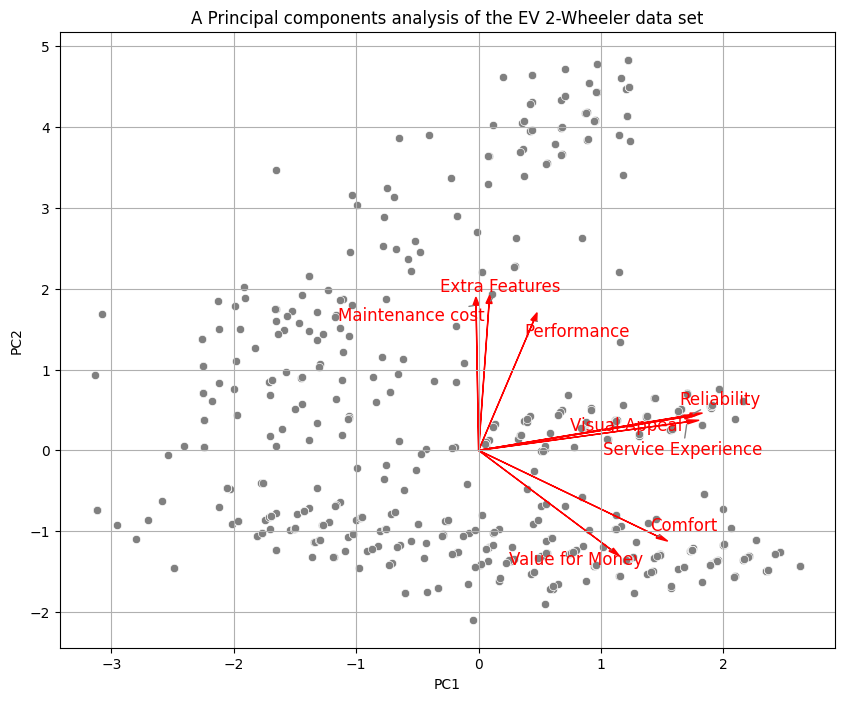

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

index_names = factor_loadings.index

plt.figure(figsize=(10, 8)) 

sns.scatterplot(x='PC1', y='PC2', data=df_pca, color='grey')

texts = []
for i in range(len(factor_loadings)):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, 
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    text = plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, 
                    index_names[i], fontsize=12, ha='center', color='red', va='center_baseline')
    texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)

plt.savefig("pca_2w.png", format='png')

plt.show()


In [38]:
## perform KMeans clustering on the dataset

data_km28 = []

for k in range(2, 9):
    model = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    data_km28.append(model)


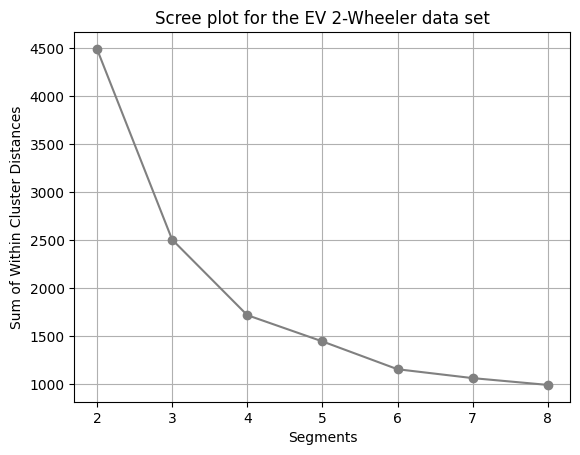

In [39]:
wcss = []
for model in data_km28:
    wcss.append(model.inertia_)

plt.plot(range(2, 9), wcss, marker='o', linestyle='-', color='grey')

plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.grid(True)

plt.show()


In [40]:
wcss_diff = pd.DataFrame({
    'Segments': range(2, 9),
    'WCSS Difference': [0] + list(pd.Series(wcss).diff().dropna())
})

# Ensure the first value of 'WCSS Difference' is 0
wcss_diff.iloc[0, 1] = 0

print(wcss_diff)


   Segments  WCSS Difference
0         2         0.000000
1         3     -1985.469532
2         4      -787.130051
3         5      -273.565866
4         6      -289.910320
5         7       -92.421793
6         8       -70.872848


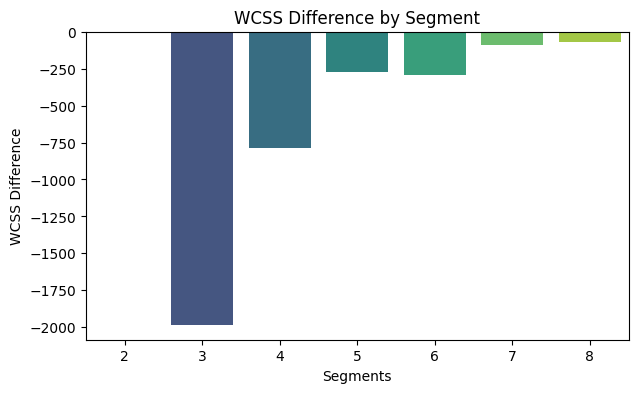

In [42]:
plt.figure(figsize=(7, 4))

sns.barplot(data=wcss_diff, x='Segments', y='WCSS Difference', palette='viridis')

plt.xlabel("Segments")
plt.ylabel("WCSS Difference")
plt.title("WCSS Difference by Segment")

plt.savefig("wcss_diff.png")
plt.show()


above scree plot shows distinct elbow at four segments indicating the optimum number of clusters/segments 

In [66]:
kmeans = data_km28[2]
df_clusters = pd.DataFrame(df_scaled, columns = seg_data.columns)
df_clusters['cluster'] = kmeans.labels_
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

## Segment profiling

In [47]:
profile = seg_data.copy()
profile['cluster'] = kmeans.labels_
col_segment = df_clusters.columns
pivot_data = profile[col_segment].groupby('cluster').mean().T
pivot_mean = pivot_data.mean(axis = 1).reset_index()
pivot_mean.columns = ['Variable', 'Value']

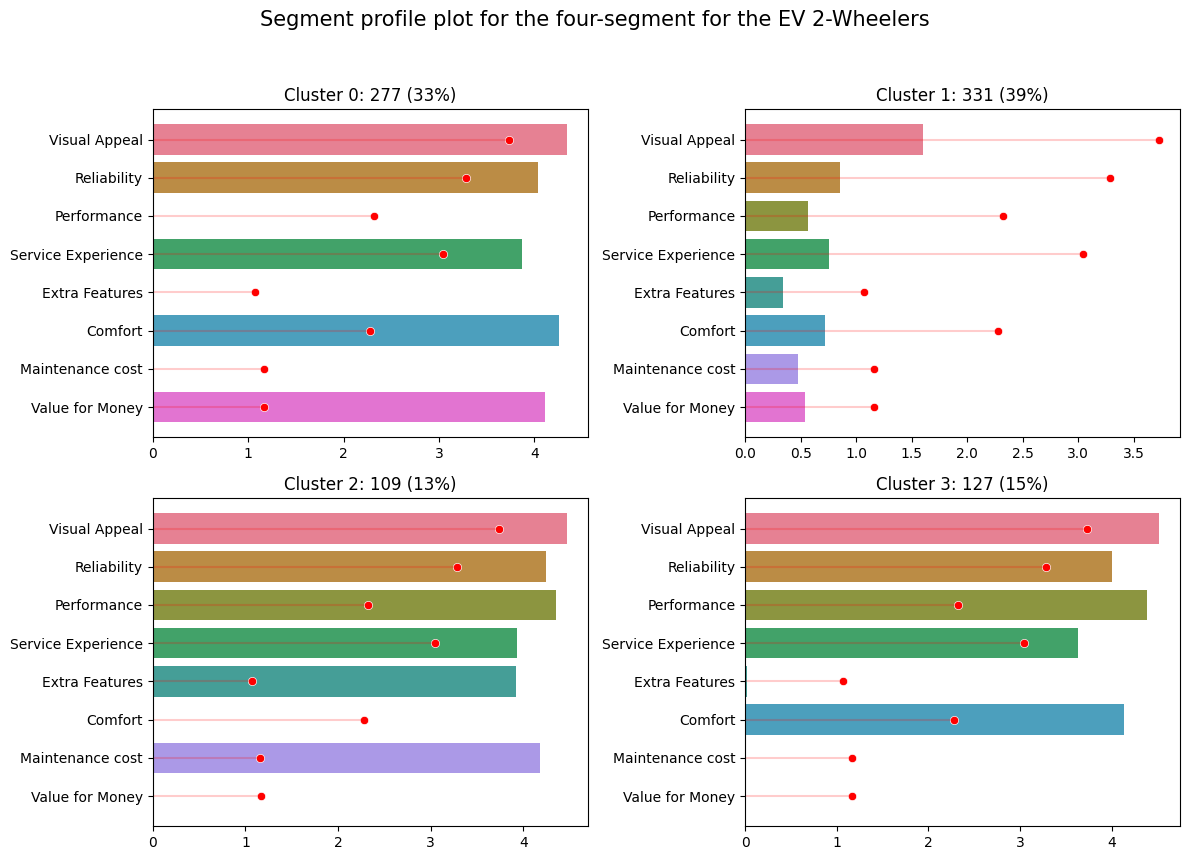

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

axes = axes.flatten()
palette = sns.color_palette("husl", len(pivot_data))
for i, ax in enumerate(axes):
    sns.barplot(data=pivot_data, x=i, y=pivot_data.index, ax=ax, palette=palette)
    sns.scatterplot(data=pivot_mean, x='Value', y='Variable', color='red', ax=ax)
    
    for index, row in pivot_mean.iterrows():
        ax.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha=0.2)
    
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(f"Cluster {i}: {profile['cluster'].value_counts()[i]} ({profile['cluster'].value_counts()[i]*100/len(profile):.0f}%)")

fig.suptitle("Segment profile plot for the four-segment for the EV 2-Wheelers", fontsize=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("segment_profile.png")
plt.show()



The chart above illustrates varied consumer perceptions across different segments. Segment 0, comprising 15% of the market, values electric two-wheelers for their visual appeal, reliability, performance, service experience, and comfort. In contrast, Segment 1, the largest group at 39%, expresses dissatisfaction across all evaluated aspects. Segment 2, accounting for 33% of consumers, values visual appeal, reliability, service experience, and comfort, while also emphasizing good value for money. Lastly, Segment 3, the smallest group at 13%, values visual appeal, reliability, performance, service experience, extra features, and maintenance cost, highlighting distinct preferences, especially regarding product features and costs.

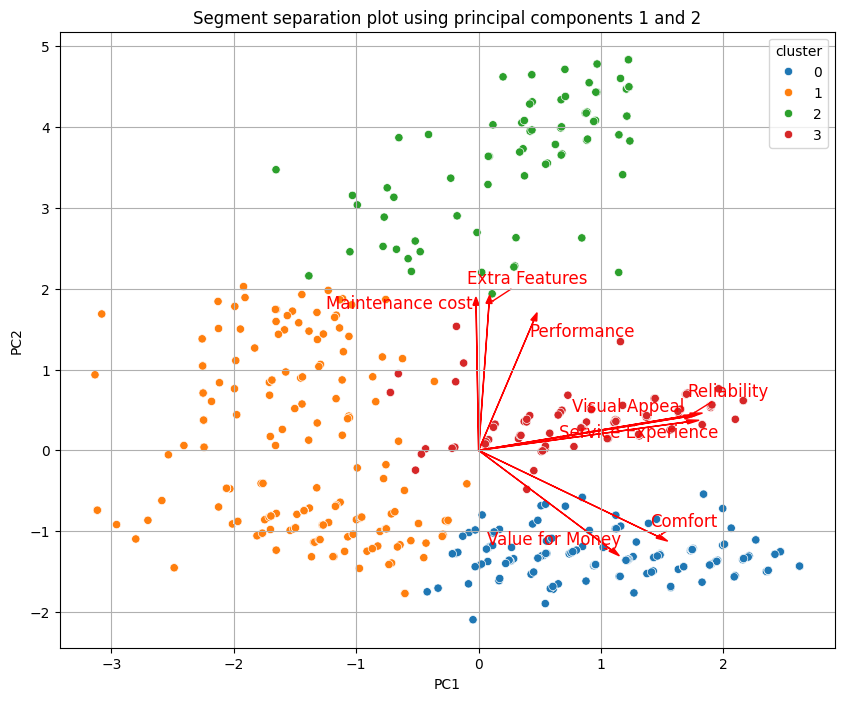

In [68]:
index_names = factor_loadings.index

plt.figure(figsize=(10, 8))

sns.scatterplot(data_pca, x='PC1', y='PC2', hue='cluster', palette='tab10')

arrows = []
texts = []
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, 
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    
    texts.append(
        plt.text(factor_loadings['PC1'][i] * 3.5, 
                 factor_loadings['PC2'][i] * 3.5, 
                 index_names[i], fontsize=12, ha='center', color='red')
    )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)

plt.savefig("segment_separation.png")
plt.show()


The preceding figure, employing principal components, underscores the disparities among market segments. Notably, Segment 1, despite its size, stands out for its ambiguous sentiments, distinguishing it as unique in its lack of clear satisfaction.







# Describing Segments

In [69]:
df_desc = df.copy()
df_desc['cluster'] = kmeans.labels_

In [70]:
def mosaicplot(df, color_list, figsize=(5, 5), barwidth=0.8, title="Simple Mosaic Plot"):
    proportions = df.div(df.sum(axis=1), axis=0)
    
    cum_proportions = proportions.cumsum(axis=1)
    
    cols = cum_proportions.columns[::-1]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    x = np.arange(len(df))  
    
    for i, col in enumerate(cols):
        ax.bar(x, cum_proportions[col], width=barwidth, color=color_list[i], edgecolor='white', label=col)
    
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Segments")
    
    ax.set_title(title)
    ax.set_xlabel("Categories")
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    
    plt.show()


In [77]:
color_list = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff', '#ff8000', '#8000ff']

sentiment_clust = df_desc.groupby(['cluster', 'sentiment']).size().unstack(fill_value=0)


In [75]:
sentiment_clust

sentiment,negative,neutral,positive
cluster,,,
0,30,41,206
1,205,8,118
2,16,0,93
3,13,4,110


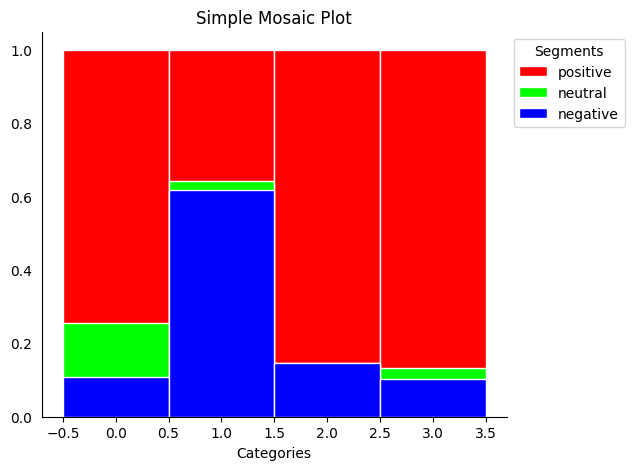

In [78]:
mosaicplot(sentiment_clust, color_list[:3], figsize=(6,5), barwidth = 1)


The mosaic plot above delves into consumer sentiments, highlighting positive perceptions across all segments except Segment 1, which notably expresses dissatisfaction across various aspects.

In [82]:
used_clust = df_desc.pivot_table(index='cluster', columns='Used it for', aggfunc='size', fill_value=0)

In [83]:
used_clust

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,194,55,7,19,2
1,245,47,7,27,5
2,86,19,2,1,1
3,75,39,4,9,0


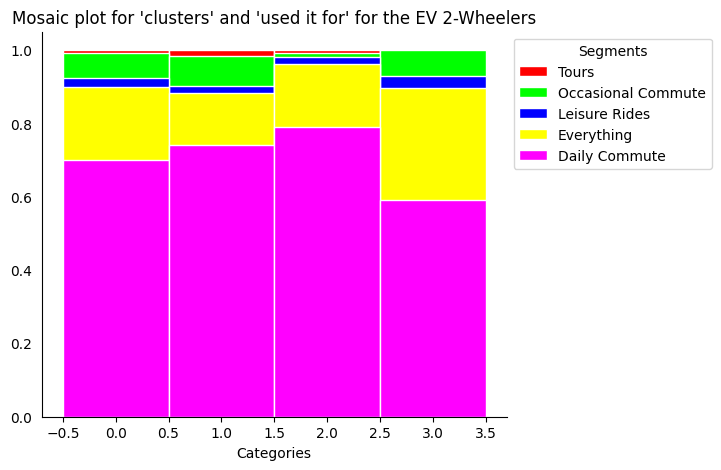

In [88]:
mosaicplot(used_clust, color_list[:5], figsize=(6,5), barwidth = 1, title = "Mosaic plot for 'clusters' and 'used it for' for the EV 2-Wheelers" )

The mosaic plot above demonstrates that most segments primarily utilize electric vehicles for daily commuting, with minimal usage reported for tours, occasional commuting, and leisure rides.







In [86]:
clust_owned = df_desc.groupby(['cluster', 'Owned for']).size().unstack(fill_value=0)


In [87]:
clust_owned

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,41,51,79,56,50,0
1,40,56,67,117,50,1
2,14,13,43,20,19,0
3,16,14,31,10,56,0


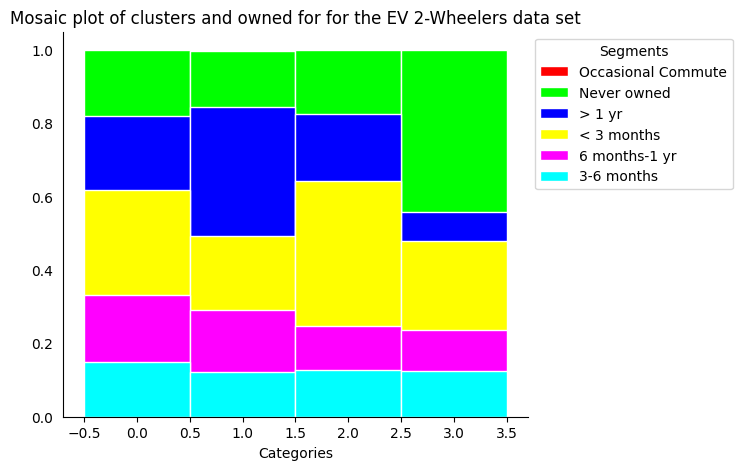

In [91]:
mosaicplot(clust_owned, color_list[:6], figsize=(6,5), barwidth = 1, title = "Mosaic plot of clusters and owned for for the EV 2-Wheelers data set")


The mosaic plot above illustrates the varying ownership durations of electric vehicles across segments. Segment 1 stands out with ownership exceeding one year, whereas Segment 0 comprises individuals with no previous ownership experience. Segment 2 shows moderate ownership durations ranging from less than three months to over a year, while Segment 3 consists of consumers who have owned electric vehicles for a few days to less than three months.

In [92]:
ridden_clust = df_desc.groupby(['cluster', 'Ridden for']).size().unstack(fill_value=0)

In [93]:
ridden_clust

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,11,44,158,14,0
1,15,61,185,18,1
2,5,18,62,5,0
3,1,15,54,1,0


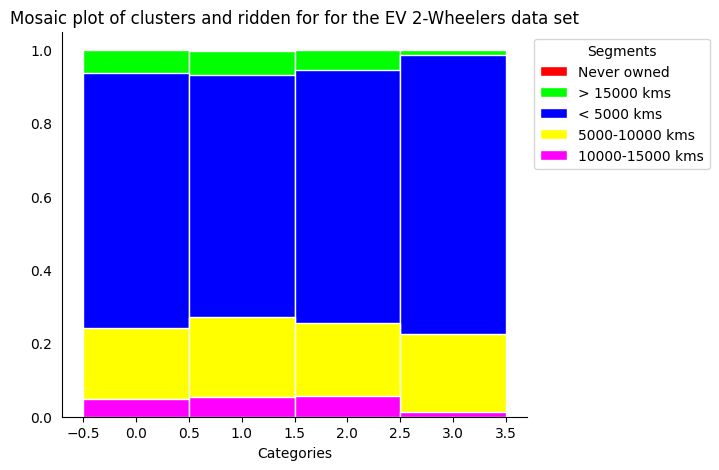

In [95]:
mosaicplot(ridden_clust, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot of clusters and ridden for for the EV 2-Wheelers data set' )

The mosaic plot above provides insights into the distances traveled by consumers using electric vehicles. It reveals that all segments primarily use these vehicles for commuting purposes, with the majority covering distances under 5000 kilometers. A smaller portion of users falls within the 5000 to 10000 kilometers range, which corresponds to their commuting requirements.

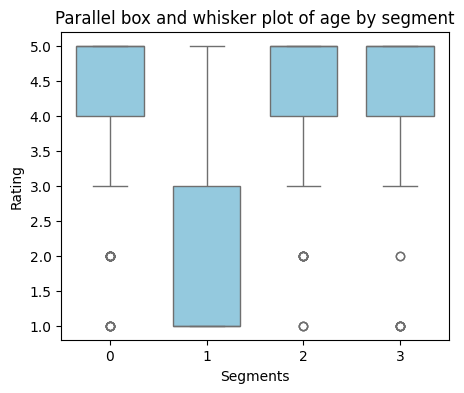

In [103]:
plt.figure(figsize=(5, 4))
boxplot_color = 'skyblue' 

sns.boxplot(data=df_desc, x='cluster', y='rating', color=boxplot_color, width=0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")

plt.savefig("rating.png")
plt.show()



The parallel box and whisker plot above highlights substantial variations in average ratings across segments. Notably, Segment 1 stands out with consistently lower ratings across all aspects, reflecting widespread dissatisfaction among its consumers.

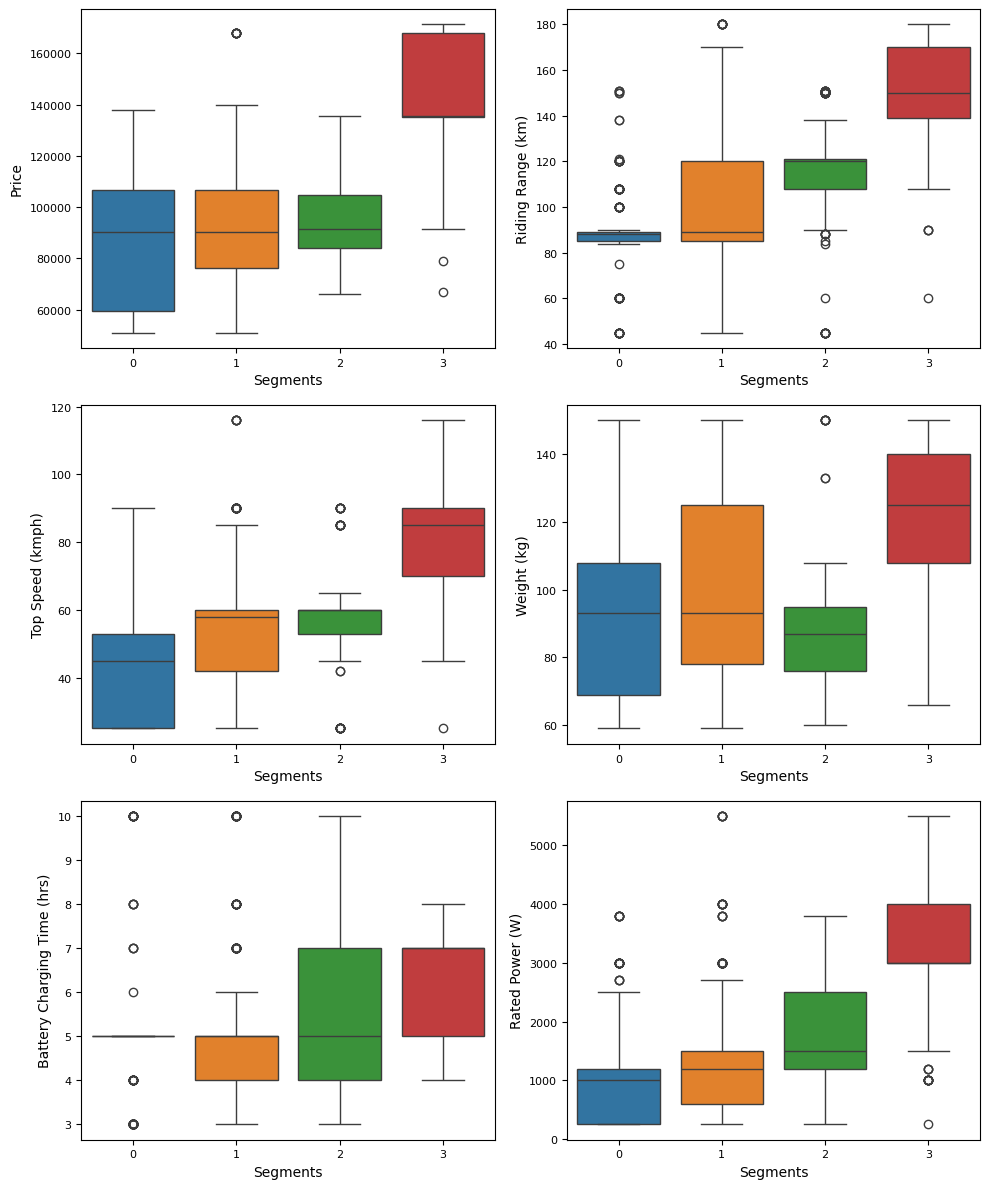

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette with distinct colors for each boxplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 12))

# Loop over the selected columns
for i, col in enumerate(df_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    
    # Use a distinct color from the palette for each boxplot
    sns.boxplot(data=df_desc, x='cluster', y=col, palette=colors)
    
    plt.xlabel("Segments", fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


When examining the technical specifications of electric vehicles across segments, distinctive trends emerge. Segment 0 shows a preference for premium EVs characterized by higher prices and extended riding ranges, catering to consumers seeking luxury and long-distance capabilities. In contrast, Segment 1 leans towards more economical options with lower prices and moderate riding ranges, ideal for daily commuting needs. Both Segment 2 and Segment 3 prioritize affordability, albeit with slight variations in riding range and speed preferences. In terms of vehicle weight, Segment 0 and Segment 1 tend to favor heavier models, while Segment 2 and Segment 3 prefer lighter alternatives. Charging preferences also vary: Segment 0 and Segment 3 opt for longer charging times suitable for overnight needs, while Segment 1 and Segment 2 prioritize faster charging for quicker turnaround times. These nuanced consumer preferences collectively shape the dynamics of India's electric vehicle market.